<a href="https://colab.research.google.com/github/Yogesh-dahake08/CODSOFT_INTERNSHIP/blob/main/Task_4_SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODSOFT INFOBYTE INTERNSHIP**

TASK 4: Sales Prediction Using Python

AUTHOR: Yogesh Dahake

DOMAIN : Data Science

PROBLEM STATEMENT: Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

# Import Necessary Libraries

In [2]:
import numpy as np  #linear algebra
import pandas as pd  #data processing

# Reading CSV File

In [3]:
df=pd.read_csv("/content/sample_data/Advertising.csv")  #read dataset

In [4]:
df.head()  #returns first 5 entries

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()  #returns last 5 entries

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
#returns tuple of shape (Rows, columns) of dataframe
df.shape

(200, 5)

In [7]:
#prints information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#returns numerical description of the data in the dataframe
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Droping the Column

In [9]:
#dropping the column 'Unnamed: 0'
df=df.drop(columns=["Unnamed: 0"])

In [10]:
df  #return dataframe

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
x=df.iloc[:, 0:-1]

In [12]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
y=df.iloc[:,-1]

In [14]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [16]:
x_train

,TV,Radio,Newspaper
116,139.2,14.3,25.6
138,43.0,25.9,20.5
155,4.1,11.6,5.7
82,75.3,20.3,32.5
160,172.5,18.1,30.7
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [17]:
x_test

,TV,Radio,Newspaper
56,7.3,28.1,41.4
37,74.7,49.4,45.7
67,139.3,14.5,10.2
79,116.0,7.7,23.1
80,76.4,26.7,22.3
188,286.0,13.9,3.7
183,287.6,43.0,71.8
10,66.1,5.8,24.2
128,220.3,49.0,3.2
62,239.3,15.5,27.3


In [18]:
x_train=x_train.astype(int)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)

In [19]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

# Applying Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(x_test_scaled)

# Evaluate the performance of a Linear Regerssion Model

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_pred)

0.9222988021105912

# Analyzing Data By Scatter Plot

In [26]:
import matplotlib.pyplot as plt

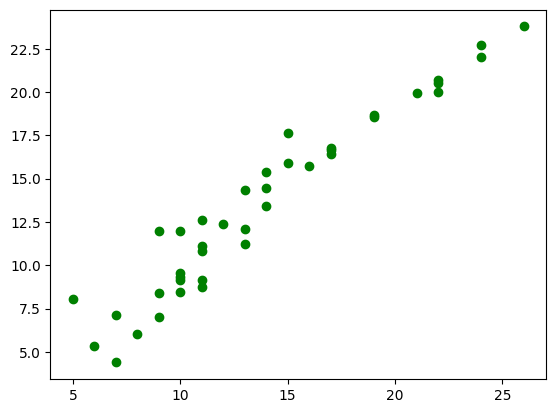

In [27]:
plt.scatter(y_test,y_pred,c='g')